IRIS Dataset



Authors:
Dylan Alick (400076938),
Simran Chadda (400485703),
Sourabh Dhumale (400487107),
Sobia Eram Khan Khan (400485847)




Date: November 15th, 2022



In [322]:
from google.colab import drive
drive.mount('/content/drive')
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing time library for Computational times
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
#Metrics for Classification
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report

#Libraries for PCA and Feature Selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import mutual_info_classif

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [323]:
#Reading the data and printing out first 5 columns
path ="/content/drive/MyDrive/Machine Learning Project/iris.data"
iris_data = pd.read_csv(path, names=['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width', 'Class'])
iris_data.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x_features = iris_data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
y=iris_data['Class']

#Scaled Features for x
x_scaled = StandardScaler().fit_transform(x_features)
#Split Training and Test Data - 25%
pcaTrain_x, pcaTest_x, pcaTrain_y, pcaTest_y = train_test_split(x_scaled,y, test_size=0.25)

print(pcaTrain_x.shape)
print(pcaTrain_y.shape)

Selecting Best Features using SelectKBest and Mutual Info Classifcation

In [ ]:
#Selecting the 2 best features in dataset
select = SelectKBest(score_func=chi2, k=2)
z = select.fit_transform(x_features,y)
names = x_features.columns.values[select.get_support()]
scores = select.scores_[select.get_support()]
names_scores = list(zip(names, scores))

MI_score = mutual_info_classif(x_features, y)
for feature in zip(x_features, MI_score):
    print(feature)

print("------------------------------------------------------------------------")
print(names)
print(scores)

#Based on the algorithms for feature selection, the best features are "Petal Length and "Petal Width
x_BestFeatures = iris_data[['Petal Length', 'Petal Width']]
train_x, test_x, train_y, test_y = train_test_split(x_BestFeatures,y,test_size=0.25)

In [ ]:
#Visualize the Dataset without PCA

#2 feature plot for sepals
sns.lmplot(x="Sepal Length",y= "Sepal Width", hue="Class",data=iris_data, fit_reg = False)
plt.title("Sepal Length vs Sepal Width")

#2 feature plot for petals
sns.lmplot(x="Petal Length",y= "Petal Width", hue="Class",data=iris_data, fit_reg = False)
plt.title("Petal Length vs Petal Width")

PCA

In [ ]:
#Applying pca with 2 components to reduce dimensionality 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

pca_features = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_features.head(5)

pca_iris = pd.concat([pca_features, iris_data[['Class']]], axis = 1)
pca_iris.head(5)

In [ ]:
#Visualize Dataset with PCA
sns.lmplot(x='Principal Component 1', y='Principal Component 2', data=pca_iris, hue='Class', fit_reg=False, legend=True)
plt.title('2D Principal Component Plot')
plt.show()

KNN Classifer using PCA 

K-Nearest Neigbours Algorithm
Training Time: 0.0015 s
Testing Time: 0.002 s
{'KNN Accuracy:': 0.9736842105263158}
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



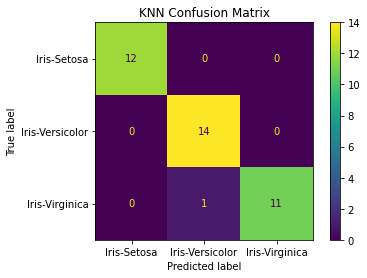

In [324]:
print("K-Nearest Neigbours Algorithm")
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4,weights='distance',metric='minkowski')
knn.fit(pcaTrain_x, pcaTrain_y)
end = time.time()
trainingTime = end-start
print("Training Time: {:.2}".format(trainingTime),"s")

start = time.time()
y_predKNN = knn.predict(pcaTest_x)
end = time.time()
testingTime = end-start
print("Testing Time: {:.2}".format(testingTime),"s")

print ({"KNN Accuracy:":metrics.accuracy_score(pcaTest_y,y_predKNN)})
print(classification_report(pcaTest_y,y_predKNN))
knn_CM = metrics.confusion_matrix(pcaTest_y,y_predKNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_CM, display_labels = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
cm_display.plot()
plt.title('KNN Confusion Matrix')
plt.show()

KNN Classifer using Feature Selection

K-Nearest Neigbours Algorithm
Training Time: 0.0065 s
Testing Time: 0.0034 s
{'KNN Accuracy:': 0.9736842105263158}
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



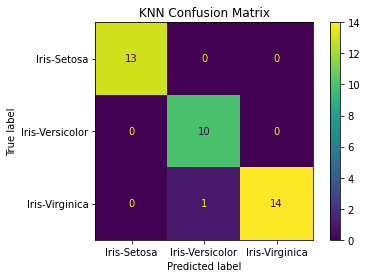

In [326]:
print("K-Nearest Neigbours Algorithm")
start = time.time()
knn = KNeighborsClassifier(n_neighbors=4,weights='distance',metric='minkowski')
knn.fit(train_x, train_y)
end = time.time()
trainingTime = end-start
print("Training Time: {:.2}".format(trainingTime),"s")

start = time.time()
y_predKNN = knn.predict(test_x)
end = time.time()
testingTime = end-start
print("Testing Time: {:.2}".format(testingTime),"s")

print ({"KNN Accuracy:":metrics.accuracy_score(test_y,y_predKNN)})
print(classification_report(test_y,y_predKNN))
knn_CM = metrics.confusion_matrix(test_y,y_predKNN)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_CM, display_labels = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
cm_display.plot()
plt.title('KNN Confusion Matrix')
plt.show()

Gaussian Naive Bayes Classifier using PCA


Gaussian Naive Bayes Algorithm
Training Time: 0.003 s
Testing Time: 0.0014 s
{'Gaussian NB Accuracy:': 0.9473684210526315}
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



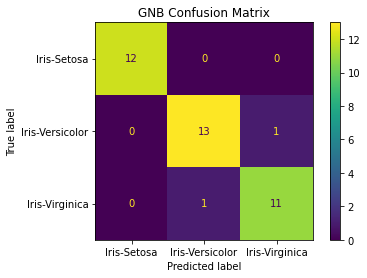

In [329]:
print("Gaussian Naive Bayes Algorithm")
start = time.time()
gnb = GaussianNB()
gnb.fit(pcaTrain_x, pcaTrain_y)
end = time.time()
trainingTime = end-start
print("Training Time: {:.2}".format(trainingTime),"s")

start = time.time()
y_predGNB = gnb.predict(pcaTest_x)
end = time.time()
testingTime = end - start
print("Testing Time: {:.2}".format(testingTime),"s")

print ({"Gaussian NB Accuracy:":metrics.accuracy_score(pcaTest_y,y_predGNB)})
print(classification_report(pcaTest_y,y_predGNB))
gnb_CM = metrics.confusion_matrix(pcaTest_y,y_predGNB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = gnb_CM, display_labels = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
cm_display.plot()
plt.title('GNB Confusion Matrix')
plt.show()

Gaussian Naive Bayes Classifier using Feature Selection


Gaussian Naive Bayes Algorithm
Training Time: 0.0084 s
Testing Time: 0.0035 s
{'Gaussian NB Accuracy:': 1.0}
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



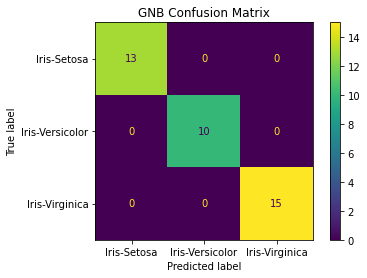

In [330]:
print("Gaussian Naive Bayes Algorithm")

start = time.time()
gnb = GaussianNB()
gnb.fit(train_x, train_y)
end = time.time()
trainingTime = end-start
print("Training Time: {:.2}".format(trainingTime),"s")

start = time.time()
y_predGNB = gnb.predict(test_x)
end = time.time()
testingTime = end - start
print("Testing Time: {:.2}".format(testingTime),"s")

print ({"Gaussian NB Accuracy:":metrics.accuracy_score(test_y,y_predGNB)})
print(classification_report(test_y,y_predGNB))
gnb_CM = metrics.confusion_matrix(test_y,y_predGNB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = gnb_CM, display_labels = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
cm_display.plot()
plt.title('GNB Confusion Matrix')
plt.show()